In [ ]:

import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/disha.csv')

In [ ]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

In [ ]:
#What are the likely distributions of the numeric variables?
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/disha.csv', sep = ';')
header = None
data

,"Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings"
0,"M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7"
1,"F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9"
2,"M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10"
3,"I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7"
4,"I,0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8"
...,...
4171,"F,0.565,0.45,0.165,0.887,0.37,0.239,0.249,11"
4172,"M,0.59,0.44,0.135,0.966,0.439,0.2145,0.2605,10"
4173,"M,0.6,0.475,0.205,1.176,0.5255,0.2875,0.308,9"
4174,"F,0.625,0.485,0.15,1.0945,0.531,0.261,0.296,10"


In [ ]:
data.shape

(4176, 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 1 columns):
 #   Column                                                                                    Non-Null Count  Dtype 
---  ------                                                                                    --------------  ----- 
 0   Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings  4176 non-null   object
dtypes: object(1)
memory usage: 32.8+ KB


In [ ]:
#data after nromalizing and feature creation
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [ ]:
!pip install eli5

     |████████████████████████████████| 106 kB 23.6 MB/s 


In [ ]:
#checking if the any data is missing
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

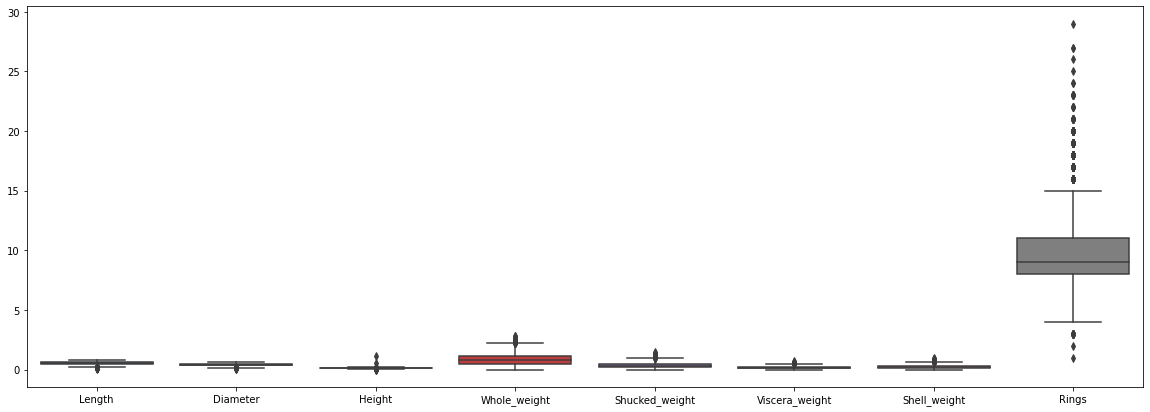

In [ ]:
#Checking the Ranges of the predictor variables and dependent variable
import seaborn as sns
import matplotlib.pylab as plt
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

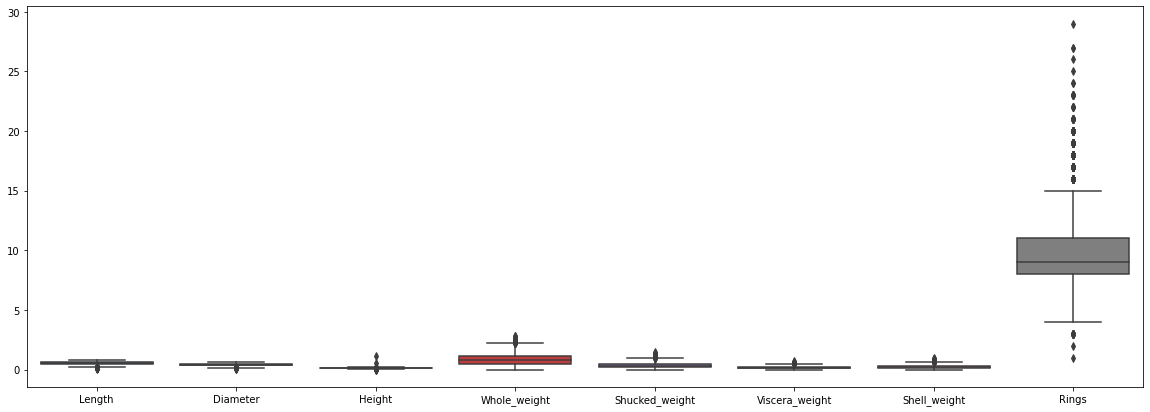

In [ ]:
#Checking the Ranges of the predictor variables after normalizing and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

In [ ]:
#checking the correlation between all the features in the data
data.corr()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
Diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
Height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
Whole_weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
Shucked_weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
Viscera_weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
Shell_weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
Rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


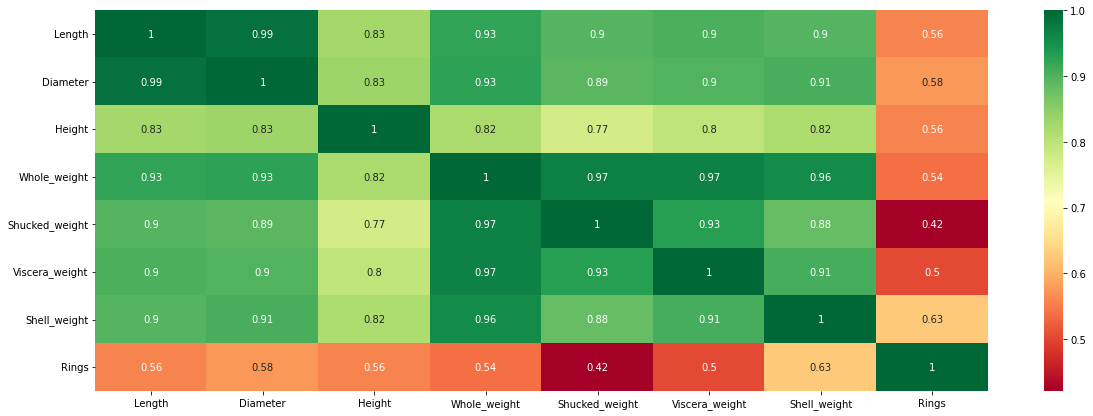

In [ ]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

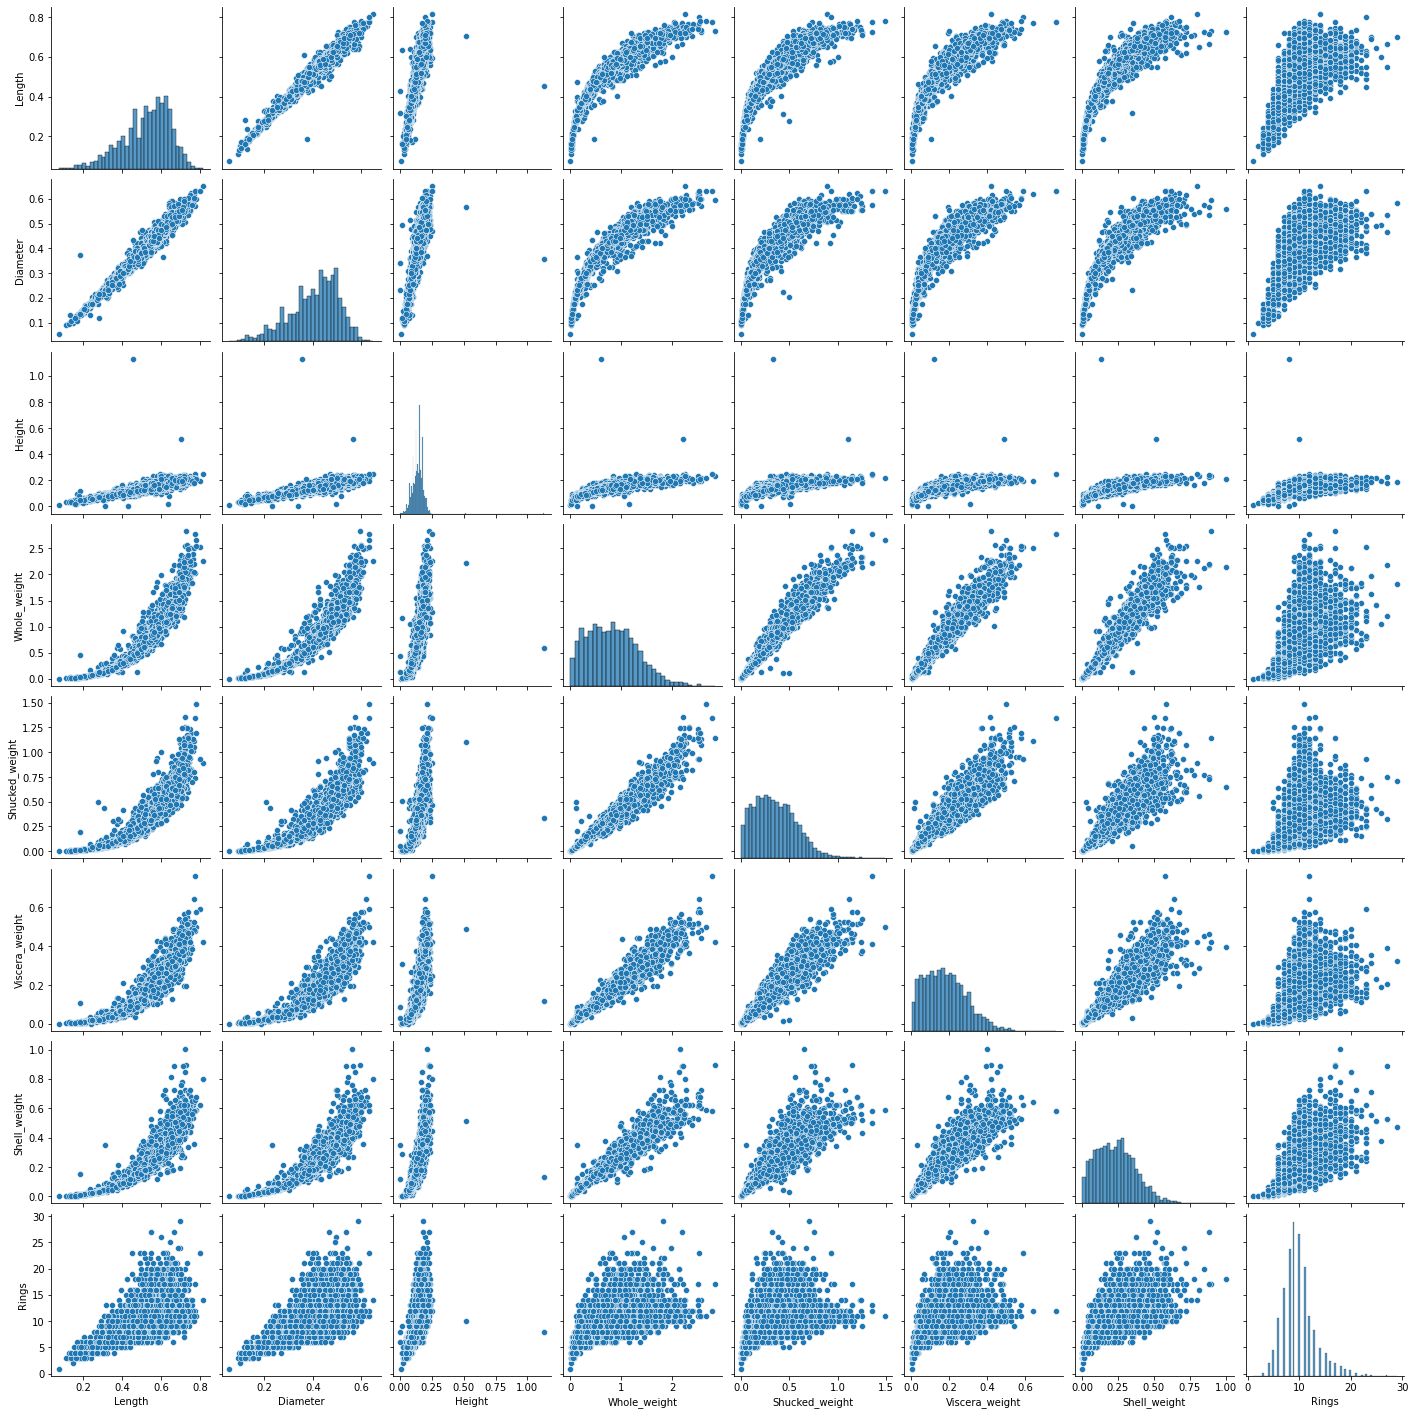

In [ ]:
#pair plot to check the colinearity
sns.pairplot(data) 

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Rings'], data[['Length', 'Diameter', 'Height']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Rings   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                          2.009e+04
Date:                Sun, 03 Apr 2022   Prob (F-statistic):                        0.00
Time:                        22:39:42   Log-Likelihood:                         -10007.
No. Observations:                4176   AIC:                                  2.002e+04
Df Residuals:                    4173   BIC:                                  2.004e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Length         1.0511      1.932      0.544      0.586      -2.736       4.838
Diameter      16.2074      2.528      6.411      0.000      11.251      21.163
Height        18.9184      1.781     10.623      0.000      15.427      22.410
==============================================================================
Omnibus:                     1051.523   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3396.786
Skew:                           1.264   Prob(JB):                         0.00
Kurtosis:                       6.624   Cond. No.                         53.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

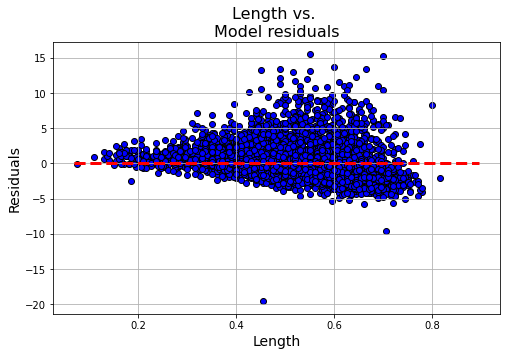

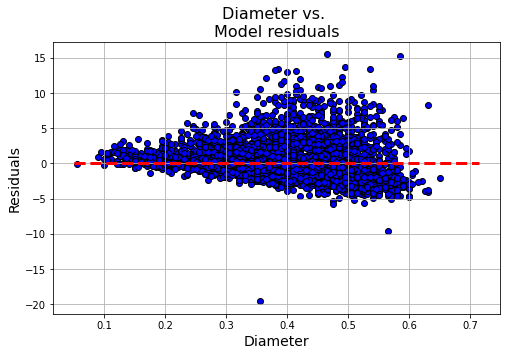

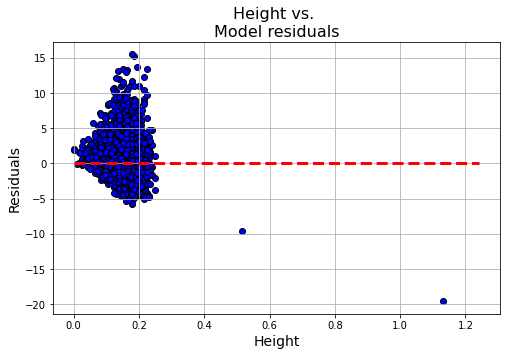

In [ ]:
#Residuals vs. predicting variables plots
data_plot = data[['Length', 'Diameter', 'Height']]
for c in data_plot.columns[:]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nModel residuals".format(c),fontsize=16)
    plt.scatter(x=data_plot[c],y=model.resid,color='blue',edgecolor='k')
    plt.grid(True)
    xmin=min(data_plot[c])
    xmax = max(data_plot[c])
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Residuals',fontsize=14)
    plt.show()

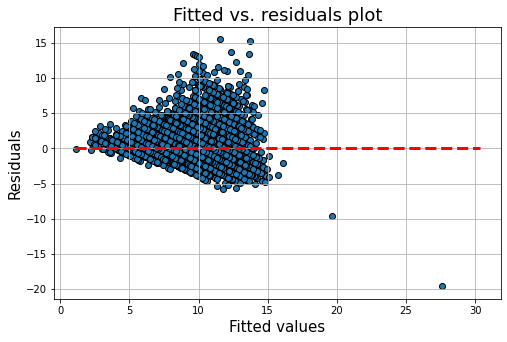

In [ ]:
# Fitted values vs. residuals plots
plt.figure(figsize=(8,5))
p=plt.scatter(x=model.fittedvalues,y=model.resid,edgecolor='k')
xmin=min(model.fittedvalues)
xmax = max(model.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

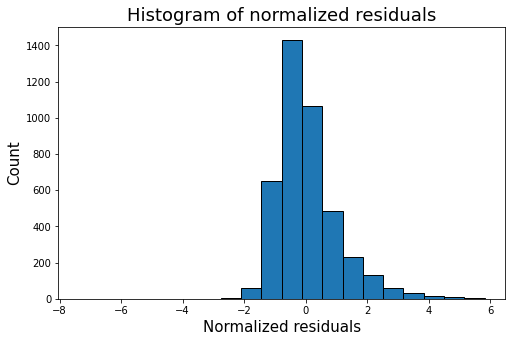

In [ ]:
#Histogram of normalized residuals
plt.figure(figsize=(8,5))
plt.hist(model.resid_pearson,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

<Figure size 576x360 with 0 Axes>

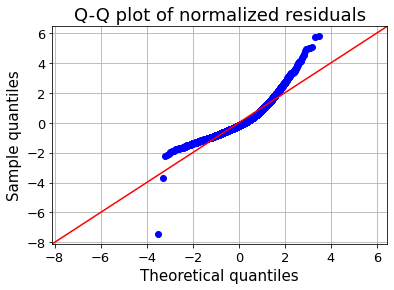

In [ ]:
#Q-Q plot of the residuals
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(8,5))
fig=qqplot(model.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import  train_test_split

X = data[ ['Length', 'Diameter', 'Height']]

y = data['Rings']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

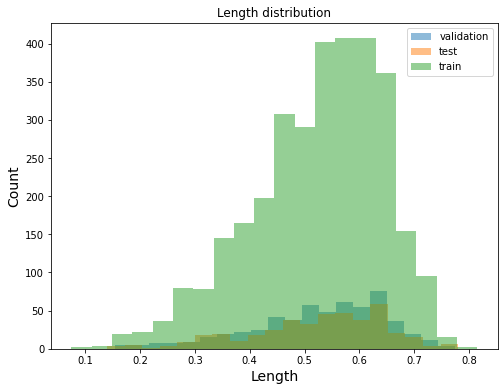

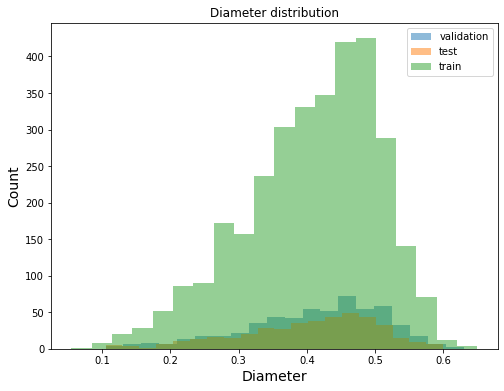

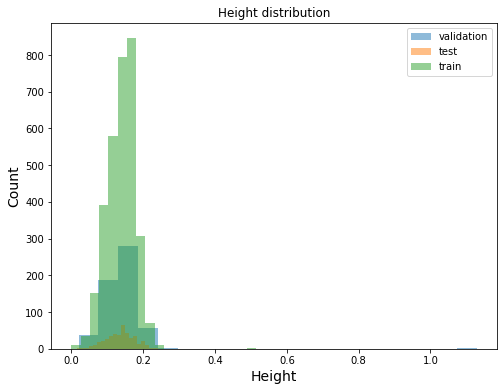

In [ ]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['Length', 'Diameter', 'Height']]

X_val_plot = X_val[['Length', 'Diameter', 'Height']]

X_train_plot = X_train[['Length', 'Diameter', 'Height']]

for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

In [ ]:
#standardizing data
from sklearn.preprocessing import StandardScaler
import numpy as np

saleprice_scaled = StandardScaler().fit_transform(data['Rings'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-2.771292  ]
 [-2.4610428 ]
 [-2.15079361]
 [-2.15079361]
 [-2.15079361]
 [-2.15079361]
 [-2.15079361]
 [-2.15079361]
 [-2.15079361]
 [-2.15079361]]

outer range (high) of the distribution:
[[4.05419024]
 [4.05419024]
 [4.05419024]
 [4.36443943]
 [4.36443943]
 [4.67468862]
 [4.98493782]
 [5.29518701]
 [5.29518701]
 [5.91568539]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


In [ ]:
#Creating binary vaiables for sex 

data = pd.get_dummies(data)

# Normalizing the data in the rings column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats
x = data[['Rings']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[['Rings']] = pd.DataFrame(x_scaled)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error: 6.43
Coefficient of determination: 0.37
R^2 score on tarining set = 0.37181427910475273


In [47]:
data.sample(10)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
2909,0.580,0.445,0.150,0.9525,0.4315,0.1945,0.2870,0.357143,0,0,1
2386,0.470,0.350,0.135,0.5670,0.2315,0.1465,0.1525,0.357143,0,1,0
3970,0.400,0.295,0.095,0.2520,0.1105,0.0575,0.0660,0.178571,0,1,0
152,0.605,0.485,0.160,1.0565,0.3700,0.2355,0.3550,0.321429,1,0,0
3240,0.650,0.525,0.190,1.4995,0.6265,0.4005,0.3950,0.464286,0,0,1
2659,0.555,0.425,0.130,0.6480,0.2835,0.1330,0.2105,0.250000,0,1,0
426,0.600,0.500,0.160,1.0150,0.3995,0.1735,0.3300,0.642857,0,0,1
687,0.525,0.400,0.170,0.7305,0.2790,0.2055,0.1950,0.357143,0,0,1
3972,0.415,0.330,0.100,0.3905,0.1925,0.0755,0.1025,0.214286,0,1,0
3994,0.245,0.175,0.055,0.0785,0.0400,0.0180,0.0200,0.142857,0,1,0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4176 non-null   float64
 1   Diameter        4176 non-null   float64
 2   Height          4176 non-null   float64
 3   Whole_weight    4176 non-null   float64
 4   Shucked_weight  4176 non-null   float64
 5   Viscera_weight  4176 non-null   float64
 6   Shell_weight    4176 non-null   float64
 7   Rings           4176 non-null   float64
 8   Sex_F           4176 non-null   uint8  
 9   Sex_I           4176 non-null   uint8  
 10  Sex_M           4176 non-null   uint8  
dtypes: float64(8), uint8(3)
memory usage: 273.4 KB


In [50]:
data['Rings'].describe()

count    4176.000000
mean        0.319017
std         0.115129
min         0.000000
25%         0.250000
50%         0.285714
75%         0.357143
max         1.000000
Name: Rings, dtype: float64

In [52]:
df_number = data[['Rings']]
df_number['number_copy_1_percent'] = df_number[['Rings']]
df_number['number_copy_5_percent'] = df_number[['Rings']]
df_number['number_copy_10_percent'] = df_number[['Rings']]
df_number['sample_num'] = data[['Unnamed: 0']]
df_number['sample_num'] = df_number['sample_num']/1000
df_number

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

KeyError: ignored

Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)


Answer : 
Independent variables are variables that are manipulated or are changed by researchers and whose effects are measured and compared. The other name for independent variables is Predictor(s).Independent variables-
Diameter
Height
Whole weight
Viscera weight
Shell weight
Sex
Shucked Weight

 Which independent variables have missing data? How much? 

 Answer : No data is missing from any of the columns, which means it is not required to impute or remove the null values from the data.

Do the training and test sets have the same data?

Answer :In machine learning, a common task is the study and construction of algorithms that can learn from and make predictions on data.[1] Such algorithms function by making data-driven predictions or decisions,[2] through building a mathematical model from input data. These input data used to build the model are usually divided in multiple data sets. In particular, three data sets are commonly used in different stages of the creation of the model: training, validation and test sets.Since the model is fitting the training data but fails on the validation data it is overfitting the training data.

In the predictor variables independent of all the other predictor variables?

Answer:No, not all the predictor variables are independent.

Which predictor variables are the most important?

Answer : 
Sex
Shucked_weight
Whole weight
Shell weight
Diameter
Viscera weight
Height
Length

Do the ranges of the predictor variables make sense?

Answer : It is hard to visualize and read data as they are not in same ranges.

What are the distributions of the predictor variables?

Answer :   Residual plots show some bit of clustering but overall the assumptions linearity and independence seem to hold because the distribution seem random around the 0 axis.

Abstract :  The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. 

Conclusion : 
In this model,the assumptions are holding true with few violations and the model gives low root mean square error on validation set.The Q-Q plot and histogram shows that the normality assumption is satisfied pretty good.Analyze and plotted the dataset using seaborn and pandas library to find the relationships and correlation between and columns.Also,I have performed the regularization and concluded that it did not help me to increase the accuracy.

References : https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

https://www.youtube.com/watch?v=fYhr8eF1ubo

https://scikit-learn.org/stable/


